# Jupyter notebook to compare Google trend of some COVID catch words with Google mobility data

#### _Work done by Nepal Poverty Team, The World Bank_

## Data sources
1. [Google Trends](https://trends.google.com/trends/explore?geo=NP&q=corona%20death,nepal%20news,nepal%20weather,corona%20nepal)
2. [Google Community Mobility Reports](https://www.google.com/covid19/mobility/)

We have used Python 3 and produced the Python 3 Jupyter notebook showing data wrangling and visualization.

## Setup

Running of this notebook requires Jupyter software system. Either Jupyter notebook or Jupyter lab can be installed on the system. In addition, Python packages, _pandas_ and _matplotlib_, are required.

### Jupyter Software Installation
https://jupyter.org/install

### pandas Package Installation
https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html

### matplotlib Package Installation
https://matplotlib.org/3.1.1/users/installing.html

After all the dependencies are installed the notebook can be imported to the Jupyter software and run.

## Imports

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

## Data extraction

In [207]:
# here, data is read from a CSV file. The CSV file can be downloaded from the below link
# https://trends.google.com/trends/explore?geo=NP&q=corona%20death,nepal%20news,nepal%20weather,corona%20nepal
gt = pd.read_csv('multiTimeline (1).csv')

# load mobility data (both from Google and Facebook)
mt = pd.read_csv('Nepal_FB_Google_OXCGRT_1594648786.csv')

## Data cleaning

In [208]:
# clean the data to bring it to structured, clean format
# replaces '<1' with zero values ('0')
# convert interest value to integer format

gt = gt['Category: All categories'].reset_index()
gt.columns = gt.loc[0, :]
gt.drop([0], inplace=True)
gt['Week'] = pd.to_datetime(gt['Week'])

for column in gt.columns[1:]:
    gt[column] = gt[column].replace(to_replace='<1', value='0', regex=True)
    gt[column] = gt[column].astype(int)

# filter google trends data to be in sync with google mobility data
gt = gt[gt['Week'].dt.date.astype(str) >= mt['Date'].min().strftime('%Y-%m-%d')]

# set datatype of movement data `date` to date format
mt['Date'] = pd.to_datetime(mt['Date'])

## Save the clean DataFrames as CSV files

In [205]:
# save the cleaned, relevant columns filtered dataframes to CSV format
# they helps to do beautiful visualizations using other softwares
gt.to_csv('Nepal COVID/google_trends.csv', index=False)
mt[['Date'] + [i for i in mt.columns if i.startswith('GCMR_') and i.endswith('_from_baseline')]].to_csv('Nepal COVID/google_mobility.csv', index=False)

## Data visualization

<Figure size 432x288 with 0 Axes>

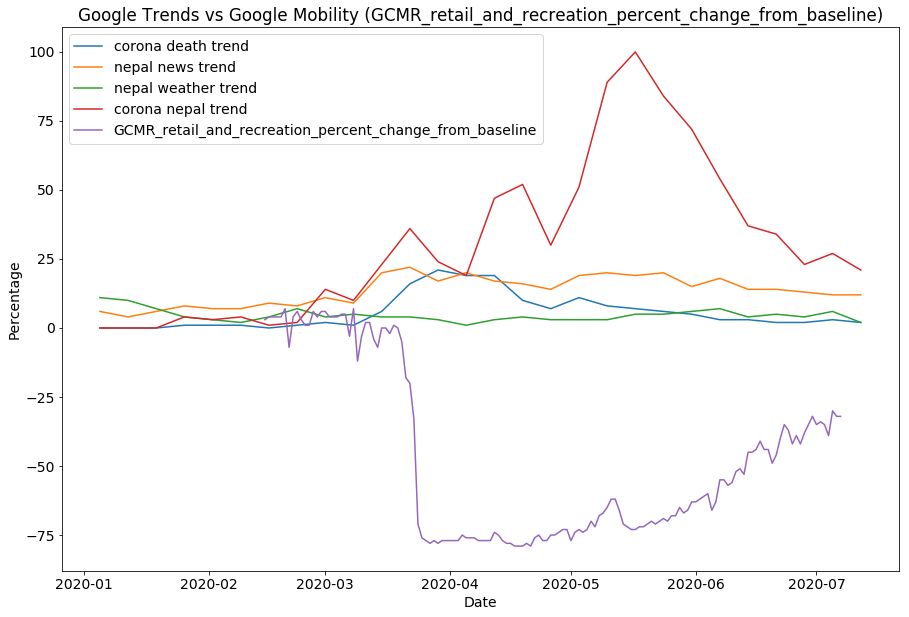

<Figure size 432x288 with 0 Axes>

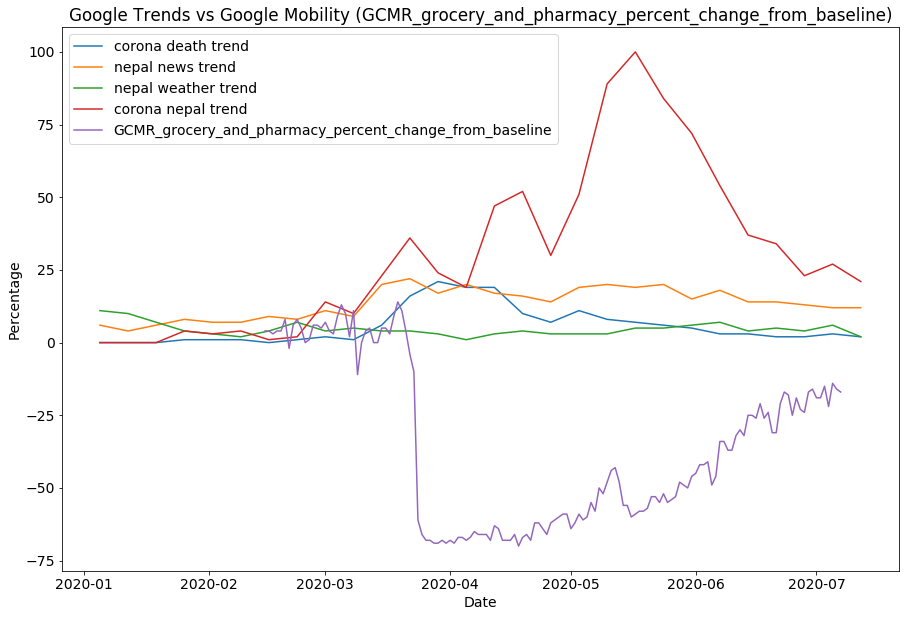

<Figure size 432x288 with 0 Axes>

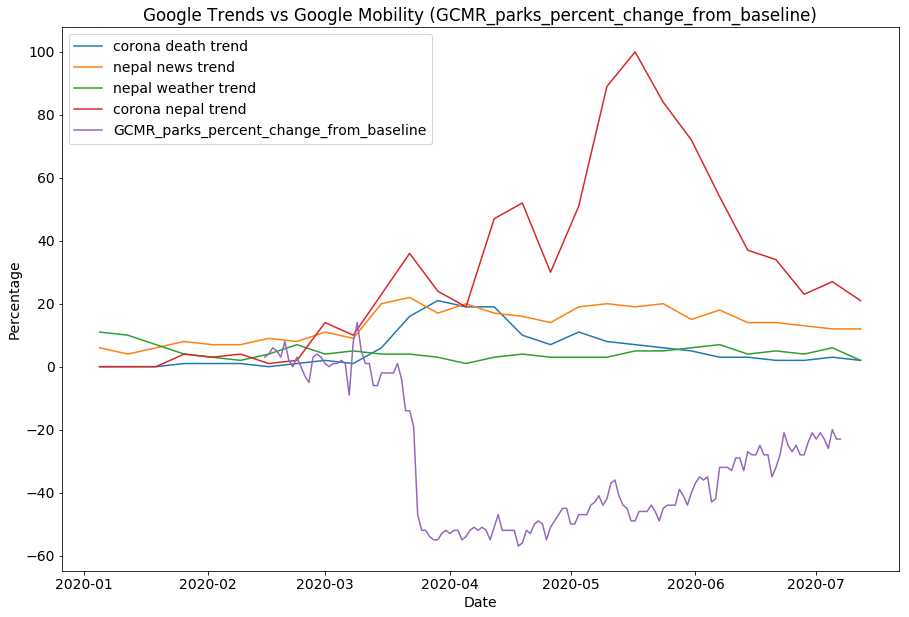

<Figure size 432x288 with 0 Axes>

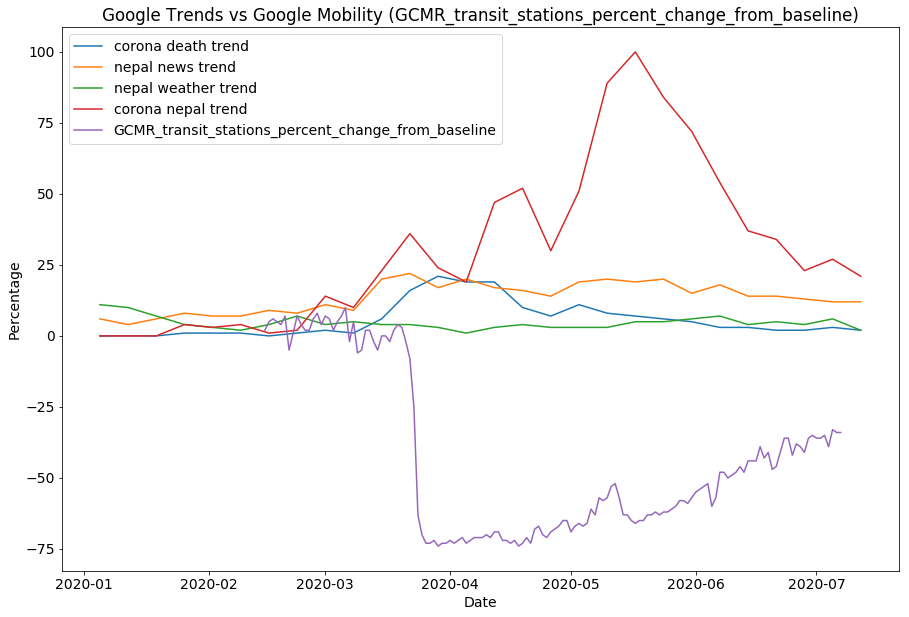

<Figure size 432x288 with 0 Axes>

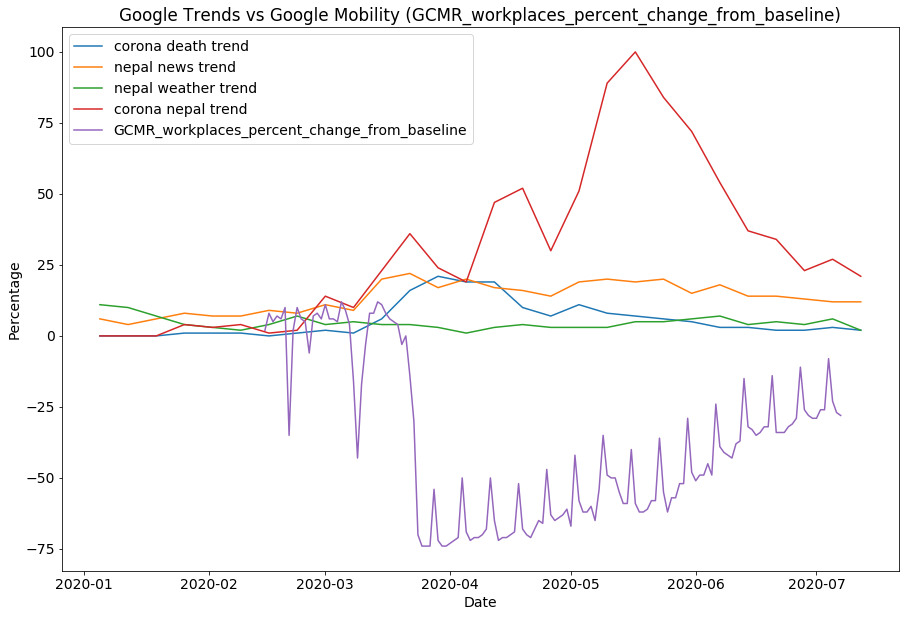

<Figure size 432x288 with 0 Axes>

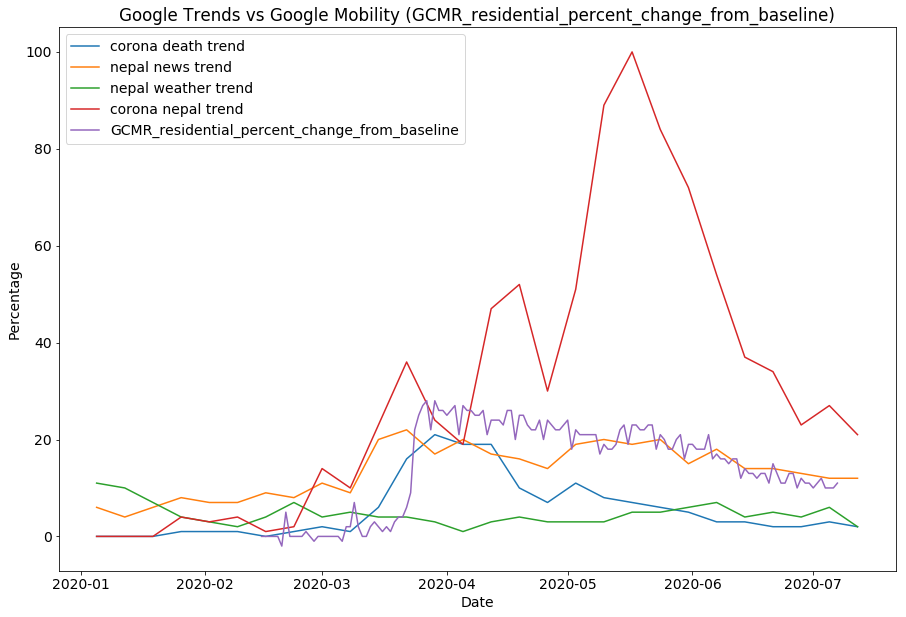

In [213]:
# visualizing Google trends for different search keywords with sectoral Google mobility data
for mobility_feature in [i for i in mt.columns if i.startswith('GCMR_') and i.endswith('_from_baseline')]:
    plt.clf()
    plt.figure(figsize=(15, 10))
    plt.rcParams.update({'font.size': 14})
    plt.title("Google Trends vs Google Mobility ({})".format(mobility_feature))
    plt.plot(gt.Week, gt['corona death: (Nepal)'], label='corona death trend')
    plt.plot(gt.Week, gt['nepal news: (Nepal)'], label='nepal news trend')
    plt.plot(gt.Week, gt['nepal weather: (Nepal)'], label='nepal weather trend')
    plt.plot(gt.Week, gt['corona nepal: (Nepal)'], label='corona nepal trend')
    plt.plot(mt['Date'], mt[mobility_feature], label=mobility_feature)
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend()
    plt.savefig('Google Trends with {}.png'.format(mobility_feature))
    plt.show()